In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

params = {"axes.titlesize": 14,
          "axes.labelsize": 14,
          "font.size": 14,
          "xtick.labelsize": 14,
          "ytick.labelsize": 14,
          "legend.fontsize": 14,
          "savefig.bbox": "tight"}
plt.rcParams.update(params)

from fiberpy.mechanics import A2Eij, FiberComposite

# Example RVE data
rve_data = {
    "rho0": 1.14e-9,
    "E0": 631.66,
    "nu0": 0.42925,
    "alpha0": 5.86e-5,
    "rho1": 2.55e-9,
    "E1": 72000,
    "nu1": 0.22,
    "alpha1": 5e-6,
    "mf": 0.5,
    "aspect_ratio": 17.983,
}
fiber = FiberComposite(rve_data)

# Original Mori-Tanaka vs. Tandon-Weng

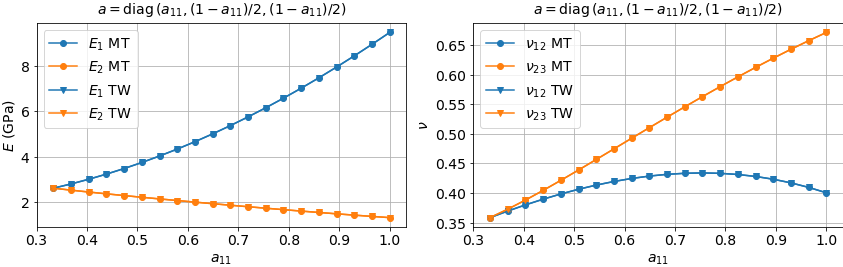

In [2]:
a11 = np.linspace(1 / 3, 1, 20)
MT = np.zeros((len(a11), 9))
TW = np.zeros((len(a11), 9))
for i in range(len(a11)):
    a = np.array([a11[i], (1 - a11[i]) / 2, (1 - a11[i]) / 2])
    A = fiber.ABar(a, "MoriTanaka")
    MT[i, :] = A2Eij(A)
    A = fiber.ABar(a, "TandonWeng")
    TW[i, :] = A2Eij(A)

plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.plot(a11, MT[:, 0] / 1e3, "C0o-", label="$E_1$ MT")
plt.plot(a11, MT[:, 1] / 1e3, "C1o-", label="$E_2$ MT")
plt.plot(a11, TW[:, 0] / 1e3, "C0v-", label="$E_1$ TW")
plt.plot(a11, TW[:, 1] / 1e3, "C1v-", label="$E_2$ TW")
plt.xlabel("$a_{11}$")
plt.ylabel("$E$ (GPa)")
plt.title("$a=\mathrm{diag}\,(a_{11}, (1-a_{11})/2, (1-a_{11})/2)$").set_y(1.02)
plt.grid()
plt.legend()

plt.subplot(122)
plt.plot(a11, MT[:, 6], "C0o-", label=r"$\nu_{12}$ MT")
plt.plot(a11, MT[:, 7], "C1o-", label=r"$\nu_{23}$ MT")
plt.plot(a11, TW[:, 6], "C0v-", label=r"$\nu_{12}$ TW")
plt.plot(a11, TW[:, 7], "C1v-", label=r"$\nu_{23}$ TW")
plt.xlabel("$a_{11}$")
plt.ylabel(r"$\nu$")
plt.title("$a=\mathrm{diag}\,(a_{11}, (1-a_{11})/2, (1-a_{11})/2)$").set_y(1.02)
plt.grid()
plt.legend()

plt.tight_layout()

# Closures

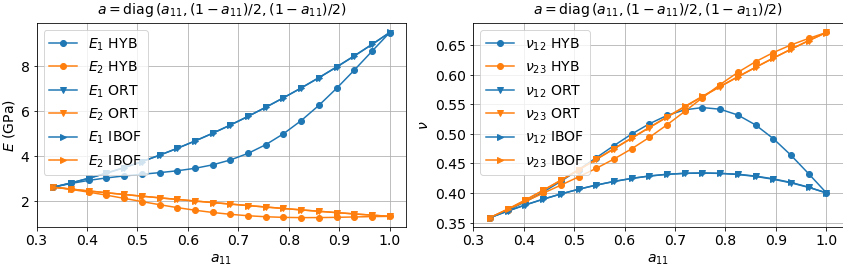

In [3]:
a11 = np.linspace(1 / 3, 1, 20)
HYB = np.zeros((len(a11), 9))
ORT = np.zeros((len(a11), 9))
IBOF = np.zeros((len(a11), 9))
for i in range(len(a11)):
    a = np.array([a11[i], (1 - a11[i]) / 2, (1 - a11[i]) / 2])
    A = fiber.ABar(a, closure="hybrid")
    HYB[i, :] = A2Eij(A)
    A = fiber.ABar(a, closure="orthotropic")
    ORT[i, :] = A2Eij(A)
    A = fiber.ABar(a, closure="invariants")
    IBOF[i, :] = A2Eij(A)

plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.plot(a11, HYB[:, 0] / 1e3, "C0o-", label="$E_1$ HYB")
plt.plot(a11, HYB[:, 1] / 1e3, "C1o-", label="$E_2$ HYB")
plt.plot(a11, ORT[:, 0] / 1e3, "C0v-", label="$E_1$ ORT")
plt.plot(a11, ORT[:, 1] / 1e3, "C1v-", label="$E_2$ ORT")
plt.plot(a11, IBOF[:, 0] / 1e3, "C0>-", label="$E_1$ IBOF")
plt.plot(a11, IBOF[:, 1] / 1e3, "C1>-", label="$E_2$ IBOF")
plt.xlabel("$a_{11}$")
plt.ylabel("$E$ (GPa)")
plt.title("$a=\mathrm{diag}\,(a_{11}, (1-a_{11})/2, (1-a_{11})/2)$").set_y(1.02)
plt.grid()
plt.legend()

plt.subplot(122)
plt.plot(a11, HYB[:, 6], "C0o-", label=r"$\nu_{12}$ HYB")
plt.plot(a11, HYB[:, 7], "C1o-", label=r"$\nu_{23}$ HYB")
plt.plot(a11, ORT[:, 6], "C0v-", label=r"$\nu_{12}$ ORT")
plt.plot(a11, ORT[:, 7], "C1v-", label=r"$\nu_{23}$ ORT")
plt.plot(a11, IBOF[:, 6], "C0>-", label=r"$\nu_{12}$ IBOF")
plt.plot(a11, IBOF[:, 7], "C1>-", label=r"$\nu_{23}$ IBOF")
plt.xlabel("$a_{11}$")
plt.ylabel(r"$\nu$")
plt.title("$a=\mathrm{diag}\,(a_{11}, (1-a_{11})/2, (1-a_{11})/2)$").set_y(1.02)
plt.grid()
plt.legend()

plt.tight_layout()

# Volume fraction dependence

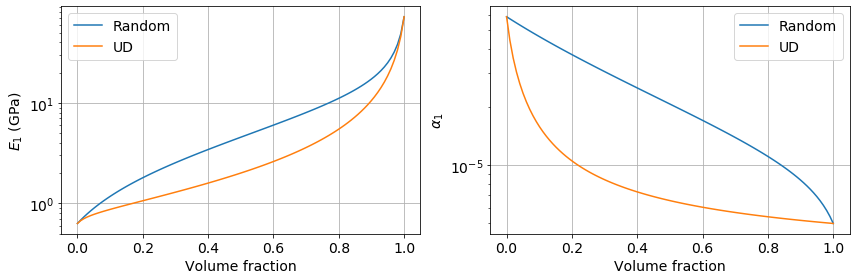

In [2]:
vf = np.linspace(0, 1, 100)
Random = np.zeros((len(vf), 12))
UD = np.zeros((len(vf), 12))
for i in range(len(vf)):
    fiber.vf = vf[i]
    A = fiber.ABar(np.ones(3) / 3, recompute_UD=True)
    Random[i, :9] = A2Eij(A)
    Random[i, 9:] = fiber.alphaBar(A)
    
    A = fiber.TandonWeng()
    UD[i, :9] = A2Eij(A)
    UD[i, 9:] = fiber.alphaBar(A)

plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.semilogy(vf, Random[:, 0]/1e3, "C0-", label="Random")
plt.semilogy(vf, UD[:, 1]/1e3, "C1-", label="UD")
plt.xlabel("Volume fraction")
plt.ylabel("$E_1$ (GPa)")
plt.grid()
plt.legend()

plt.subplot(122)
plt.semilogy(vf, Random[:, 9], "C0-", label="Random")
plt.semilogy(vf, UD[:, 9], "C1-", label="UD")
plt.xlabel("Volume fraction")
plt.ylabel(r"$\alpha_{1}$")
plt.grid()
plt.legend()

plt.tight_layout()